# Info

https://github.com/shivaverma/OpenAIGym/blob/master/cart-pole/CartPole-v0.py

In [1]:
import gym
import random
from collections import deque
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# disable eager execution to speed up
tf.compat.v1.disable_eager_execution()

tf.__version__

'2.2.0'

In [2]:
class DQN:

    """ Implementation of deep q learning algorithm """

    def __init__(self, action_space, state_space):

        self.action_space = action_space
        self.state_space = state_space
        self.epsilon = 1
        self.gamma = .95
        self.batch_size = 64
        self.epsilon_min = .01
        self.epsilon_decay = .995
        self.learning_rate = 0.001
        self.memory = deque(maxlen=10000)
        self.model = self.build_model()

    def build_model(self):

        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Dense(24, input_shape=(self.state_space,), activation='relu'))
        model.add(tf.keras.layers.Dense(24, activation='relu'))
        model.add(tf.keras.layers.Dense(self.action_space, activation='linear'))
        model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(lr=self.learning_rate))
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state, use_exploration=True):

        if use_exploration and (np.random.rand() <= self.epsilon):
            return random.randrange(self.action_space)
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])

    def replay(self):

        if len(self.memory) < self.batch_size:
            return

        minibatch = random.sample(self.memory, self.batch_size)
        states = np.array([i[0] for i in minibatch])
        actions = np.array([i[1] for i in minibatch])
        rewards = np.array([i[2] for i in minibatch])
        next_states = np.array([i[3] for i in minibatch])
        dones = np.array([i[4] for i in minibatch])

        states = np.squeeze(states)
        next_states = np.squeeze(next_states)

        targets = rewards + self.gamma*(np.amax(self.model.predict_on_batch(next_states), axis=1))*(1-dones)
        targets_full = self.model.predict_on_batch(states)

        ind = np.array([i for i in range(self.batch_size)])
        targets_full[[ind], [actions]] = targets

        self.model.fit(states, targets_full, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay


def train_dqn(episode):

    loss = []
    agent = DQN(env.action_space.n, env.observation_space.shape[0])
    for e in range(episode):
        state = env.reset()
        state = np.reshape(state, (1, 4))
        score = 0
        max_steps = 1000
        for i in range(max_steps):
            action = agent.act(state)
            next_state, reward, done, _ = env.step(action)
            score += reward
            next_state = np.reshape(next_state, (1, 4))
            agent.remember(state, action, reward, next_state, done)
            state = next_state
            agent.replay()
            if done:
                print("episode: {}/{}, score: {}".format(e, episode, score))
                break
        loss.append(score)
    return loss, agent

def test_dqn(env, episode, agent):

    loss = []
    for e in range(episode):
        state = env.reset()
        state = np.reshape(state, (1, 4))
        score = 0
        max_steps = 1000
        for i in range(max_steps):
            action = agent.act(state, use_exploration=False)
            next_state, reward, done, _ = env.step(action)
            score += reward
            next_state = np.reshape(next_state, (1, 4))
            state = next_state
            if done:
                print("episode: {}/{}, score: {}".format(e, episode, score))
                break
        loss.append(score)
    return loss

def random_policy(episode, step):

    for i_episode in range(episode):
        env.reset()
        for t in range(step):
            env.render()
            action = env.action_space.sample()
            state, reward, done, info = env.step(action)
            if done:
                print("Episode finished after {} timesteps".format(t+1))
                break
            print("Starting next episode")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
episode: 0/100, score: 28.0
episode: 1/100, score: 21.0
episode: 2/100, score: 51.0
episode: 3/100, score: 14.0
episode: 4/100, score: 21.0
episode: 5/100, score: 14.0
episode: 6/100, score: 18.0
episode: 7/100, score: 10.0
episode: 8/100, score: 10.0
episode: 9/100, score: 16.0
episode: 10/100, score: 30.0
episode: 11/100, score: 13.0
episode: 12/100, score: 8.0
episode: 13/100, score: 11.0
episode: 14/100, score: 11.0
episode: 15/100, score: 12.0
episode: 16/100, score: 11.0
episode: 17/100, score: 10.0
episode: 18/100, score: 20.0
episode: 19/100, score: 58.0
episode: 20/100, score: 152.0
episode: 21/100, score: 130.0
episode: 22/100, score: 124.0
episode: 23/100, score: 105.0
episode: 24/100, score: 123.0
episode: 25/100, score: 200.0
episode: 26/100, score: 200.0
episode: 27/100, score: 200.0
episode: 28/100, score: 200.0
episode: 29/100, score: 200.0
episode: 30/100, score: 200.0
episode: 31/100, sco

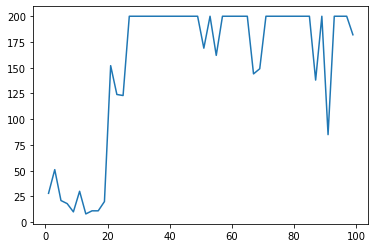

In [3]:
env = gym.make('CartPole-v0')
env.seed(0)
np.random.seed(0)

ep = 100
loss, agent = train_dqn(ep)
plt.plot([i+1 for i in range(0, ep, 2)], loss[::2])
plt.show()

episode: 0/10, score: 197.0
episode: 1/10, score: 200.0
episode: 2/10, score: 200.0
episode: 3/10, score: 187.0
episode: 4/10, score: 200.0
episode: 5/10, score: 194.0
episode: 6/10, score: 185.0
episode: 7/10, score: 200.0
episode: 8/10, score: 198.0
episode: 9/10, score: 197.0


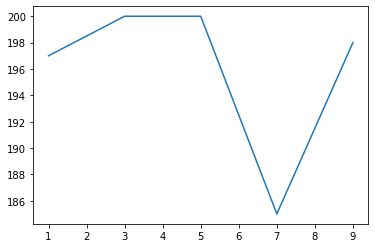

195.8

In [5]:
env = gym.make('CartPole-v0')
env.seed(0)
np.random.seed(0)

ep = 10
loss = test_dqn(env, ep, agent)
plt.plot([i+1 for i in range(0, ep, 2)], loss[::2])
plt.show()

np.mean(loss)